## Assignment: Logistic regression
Melany Macias, Ha Do & Daniel Ridzon <br>
2/14/2022 <br>

The **goal** of the assigment is to conduct a logistic regression analysis that will predict the probability of a patient having a vertebral abnormality.

In [8]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt     



In [9]:
raw_data = loadarff('column_3C_weka.arff')
df = pd.DataFrame(raw_data[0])
df['class'] = df['class'].str.decode('utf-8') 
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


###  Pre-procesing the data

In [10]:
# Checking all the columns types, missing values...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [11]:
# Separating the data from the class(the target feature) to predict
X = df.drop(['class'],axis=1)
Y = df['class']
X.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
dtype: object

In [12]:
# Converting the categorical "Class" target feature to a numerical one.
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
Y = pd.DataFrame(Y, columns = ['Class'])
Y['Class'].value_counts() 


2    150
1    100
0     60
Name: Class, dtype: int64

In [13]:
# Creating a class for the names so it is easier to plot the confusion matrix later
print(" Hernia = 0, Normal = 1, spondylolisthesis = 2")
class_names = ["Hernia","Normal","Spondylolisthesis"]

 Hernia = 0, Normal = 1, spondylolisthesis = 2


### Training the model

In [14]:
# Splitting the data
X_train,X_test, y_train, y_test = train_test_split(X,Y, stratify= Y, random_state =100)
print(f"Size of X_train is {len(X_train)} and size of X_test is {len(X_test)}")

Size of X_train is 232 and size of X_test is 78


In [15]:
# Implementing the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Coefficients: ", model.coef_)
print("\nIntercept: ", model.intercept_)

Coefficients:  [[-0.03626102  0.06556622 -0.01388205 -0.10182754 -0.06799356 -0.08945579]
 [-0.01007061 -0.05498052  0.01639292  0.04491038  0.06749524 -0.09325722]
 [ 0.04633163 -0.0105857  -0.00251087  0.05691716  0.00049832  0.182713  ]]

Intercept:  [14.23431184 -7.24853321 -6.98577862]


C:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  Evaluating the linear regression model

In [16]:
# Accuracy score of the model, comparing the predicted values with the actual values to test.
Y_predicted = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_predicted, y_test)
print("Accurary on Test data: ", training_data_accuracy)
print("The percentage seems accurate.")

Accurary on Test data:  0.8717948717948718
The percentage seems accurate.


In [17]:
## Confusion matrix
cm = confusion_matrix(y_test, Y_predicted)
cm_df = pd.DataFrame(cm, index = class_names, columns = class_names)
cm_df

,Hernia,Normal,Spondylolisthesis
Hernia,11,3,1
Normal,4,20,1
Spondylolisthesis,0,1,37


Text(0.5, 1.0, 'Confusion Matrix')

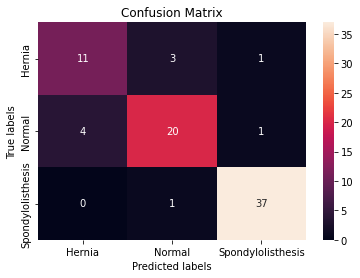

In [18]:
ax = plt.subplot()
sns.heatmap(cm_df, annot=True)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

As we can observe from the confusion matrix and the accuracy score, the logistic regression model has been implemented properly. More conclusions can be made from the classification report below:

In [19]:
print(classification_report (y_test , Y_predicted, target_names = class_names))

                   precision    recall  f1-score   support

           Hernia       0.73      0.73      0.73        15
           Normal       0.83      0.80      0.82        25
Spondylolisthesis       0.95      0.97      0.96        38

         accuracy                           0.87        78
        macro avg       0.84      0.84      0.84        78
     weighted avg       0.87      0.87      0.87        78



The recall ("true positive") value shows that how succesfull the model is according to the actual disease and what we have predicted one. When the actual disease is Spondylolisthesis, with 97% of accuracy we have predicted it correctly. 